<a href="https://colab.research.google.com/github/VasudhaMaddi/nlp/blob/main/Copy_of_NLPScript2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Information Extraction and Topic Modelling

In [ ]:
!pip install pyLDAvis

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from wordcloud import WordCloud, STOPWORDS
import pyLDAvis
import pyLDAvis.gensim
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Dataset Preparation

In [ ]:
# Load the dataset
df = pd.read_csv("CSV_sampleDataset_DataAnalyticsTrack.csv")

### Information Extraction


### Data Preprocessing

In [ ]:
# Function to clean and preprocess text data
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))  # Ensure text is converted to string
    # Convert to lowercase
    text = text.lower()
    return text

# Function to tokenize and lemmatize text
def tokenize_and_lemmatize(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

In [ ]:
# Apply text preprocessing
df['clean_content'] = df['content'].apply(clean_text)
df['tokens'] = df['clean_content'].apply(tokenize_and_lemmatize)

In [ ]:
df.head()

,Unnamed: 0,articleId,content,clean_content,tokens
0,0,1,Finding an off-the-shelf processor that is an ...,finding an offtheshelf processor that is an id...,"[finding, offtheshelf, processor, ideal, fit, ..."
1,1,2,"SAN JOSE, Calif. — Fresh details have emerged ...",san jose calif fresh details have emerged abo...,"[san, jose, calif, fresh, detail, emerged, sec..."
2,2,3,"AUSTIN, Texas — The effort to develop a 157-nm...",austin texas the effort to develop a nm litho...,"[austin, texas, effort, develop, nm, lithograp..."
3,3,4,The following sources offer additional informa...,the following sources offer additional informa...,"[following, source, offer, additional, informa..."
4,4,5,As embedded systems and the microprocessor cor...,as embedded systems and the microprocessor cor...,"[embedded, system, microprocessor, core, based..."


### Topic Modelling

In [ ]:
# Create a dictionary representation of the documents
dictionary = Dictionary(df['tokens'])

# Filter out tokens that appear in less than 5 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in df['tokens']]

In [ ]:
# Function to compute coherence score for a given number of topics
def compute_coherence_score(corpus, dictionary, k):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    return coherence_lda

# Determine the optimal number of topics
min_topics = 2
max_topics = 10
coherence_scores = []

for k in range(min_topics, max_topics + 1):
    coherence_score = compute_coherence_score(corpus, dictionary, k)
    coherence_scores.append(coherence_score)

optimal_num_topics = min_topics + coherence_scores.index(max(coherence_scores))
print("Optimal number of topics:", optimal_num_topics)


Optimal number of topics: 10


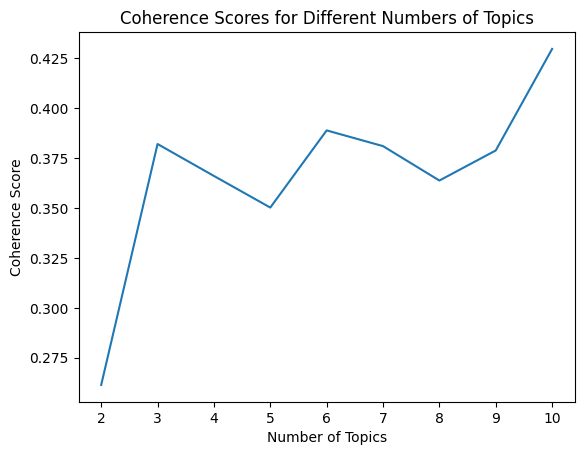

In [ ]:
# Visualize coherence scores
plt.plot(range(2, max_topics + 1), coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Scores for Different Numbers of Topics")
plt.xticks(range(2, max_topics + 1))
plt.show()

In [ ]:
# Train the LDA model with the optimal number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=optimal_num_topics, passes=20, iterations=200 )

# printing the topics
print(lda_model.print_topics())

[(0, '0.008*"industry" + 0.007*"would" + 0.007*"one" + 0.006*"could" + 0.005*"time" + 0.005*"u" + 0.005*"engineer" + 0.004*"group" + 0.004*"work" + 0.004*"many"'), (1, '0.015*"wireless" + 0.012*"digital" + 0.009*"standard" + 0.009*"chip" + 0.008*"system" + 0.007*"g" + 0.007*"data" + 0.006*"rf" + 0.006*"radio" + 0.006*"patent"'), (2, '0.022*"power" + 0.012*"v" + 0.011*"email" + 0.011*"supply" + 0.010*"design" + 0.010*"voltage" + 0.009*"device" + 0.009*"engineer" + 0.009*"output" + 0.008*"package"'), (3, '0.046*"design" + 0.018*"tool" + 0.011*"test" + 0.007*"designer" + 0.007*"system" + 0.007*"eda" + 0.006*"model" + 0.006*"verification" + 0.006*"product" + 0.006*"process"'), (4, '0.019*"semiconductor" + 0.017*"wafer" + 0.016*"process" + 0.016*"nm" + 0.014*"foundry" + 0.011*"fab" + 0.011*"manufacturing" + 0.011*"chip" + 0.010*"china" + 0.009*"production"'), (5, '0.008*"used" + 0.007*"one" + 0.006*"signal" + 0.006*"system" + 0.006*"time" + 0.005*"circuit" + 0.005*"material" + 0.005*"sensor

### Evaluation Metric

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
perplexity_lda = lda_model.log_perplexity(corpus)
print('\nPerplexity: ', perplexity_lda)


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.717650838393869

Coherence Score:  0.5060421691784813


###Visualization

In [ ]:
# Visualize topics
topics = lda_model.show_topics(formatted=False)
for topic_num, words in topics:
    print("Topic:", topic_num)
    print("Words:", [word[0] for word in words])

Topic: 0
Words: ['industry', 'would', 'one', 'could', 'time', 'u', 'engineer', 'group', 'work', 'many']
Topic: 1
Words: ['wireless', 'digital', 'standard', 'chip', 'system', 'g', 'data', 'rf', 'radio', 'patent']
Topic: 2
Words: ['power', 'v', 'email', 'supply', 'design', 'voltage', 'device', 'engineer', 'output', 'package']
Topic: 3
Words: ['design', 'tool', 'test', 'designer', 'system', 'eda', 'model', 'verification', 'product', 'process']
Topic: 4
Words: ['semiconductor', 'wafer', 'process', 'nm', 'foundry', 'fab', 'manufacturing', 'chip', 'china', 'production']
Topic: 5
Words: ['used', 'one', 'signal', 'system', 'time', 'circuit', 'material', 'sensor', 'power', 'using']
Topic: 6
Words: ['system', 'device', 'application', 'data', 'processor', 'interface', 'network', 'support', 'software', 'memory']
Topic: 7
Words: ['product', 'service', 'market', 'customer', 'network', 'business', 'component', 'president', 'supplier', 'system']
Topic: 8
Words: ['million', 'quarter', 'percent', 'sale'

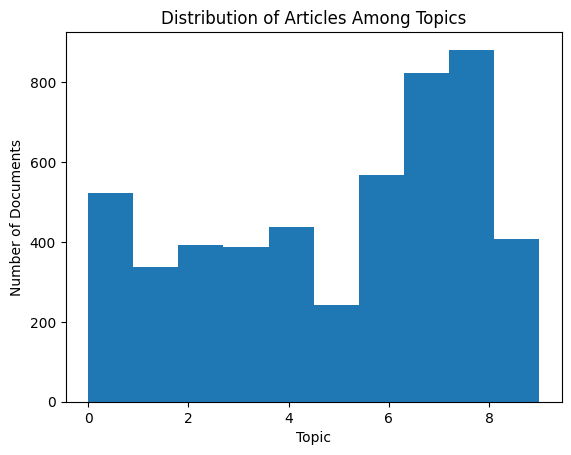

In [ ]:
# Visualize the distribution of articles among topics
# Extract topic distributions from the LDA model
topic_distribution = [lda_model[doc] for doc in corpus]

# Visualize the distribution of articles among topics
# Create an array with zeros for each document and topic
doc_topic_matrix = np.zeros((len(topic_distribution), optimal_num_topics))

# Fill the matrix with actual topic proportions
for doc_index, doc_topics in enumerate(topic_distribution):
    for topic_index, proportion in doc_topics:
        doc_topic_matrix[doc_index, topic_index] = proportion

# Plot the distribution
plt.hist(np.argmax(doc_topic_matrix, axis=1), bins=optimal_num_topics, align='mid')
plt.xlabel('Topic')
plt.ylabel('Number of Documents')
plt.title('Distribution of Articles Among Topics')
plt.show()

#### pyLDAvis Visualization


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
import pyLDAvis
import pyLDAvis.gensim
import gensim

# Assuming you have already trained your LDA model, created corpus, and dictionary
# Replace lda_model, corpus, and dictionary with your actual objects

# Visualize the topic model
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

#### WordCloud Visualization

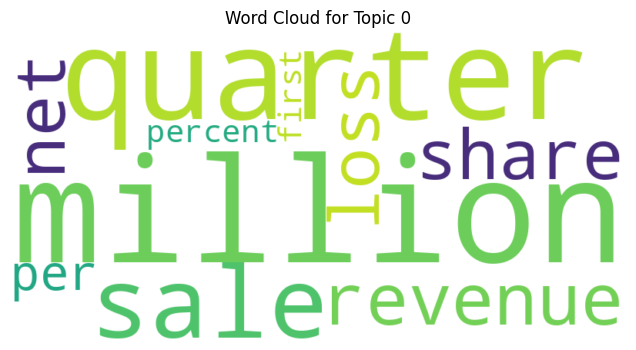

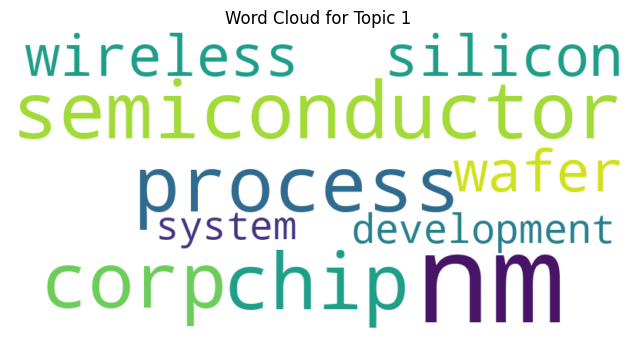

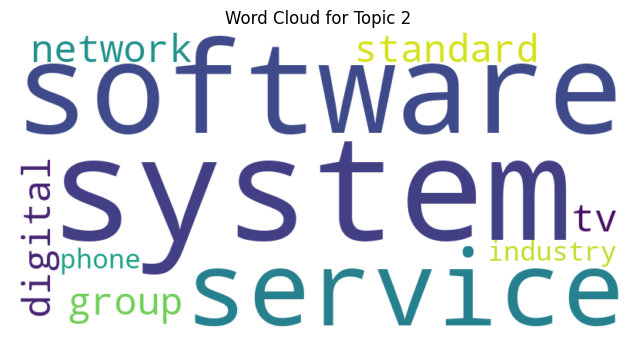

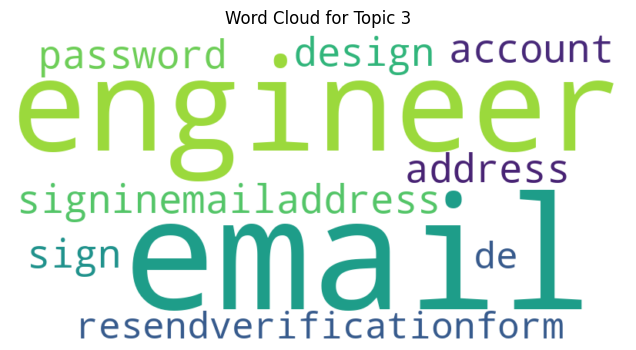

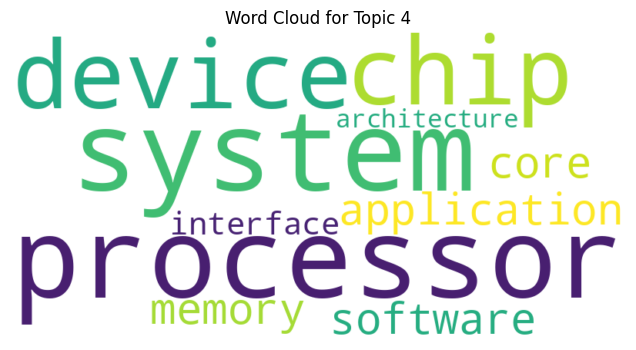

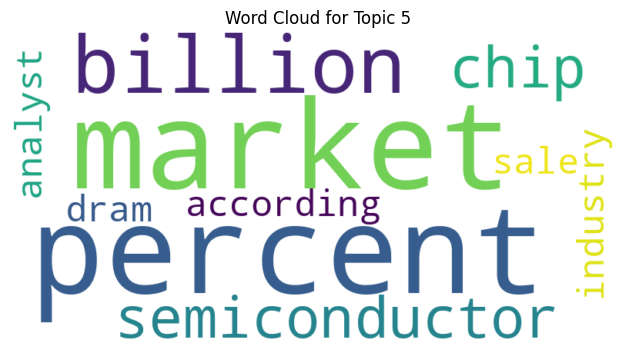

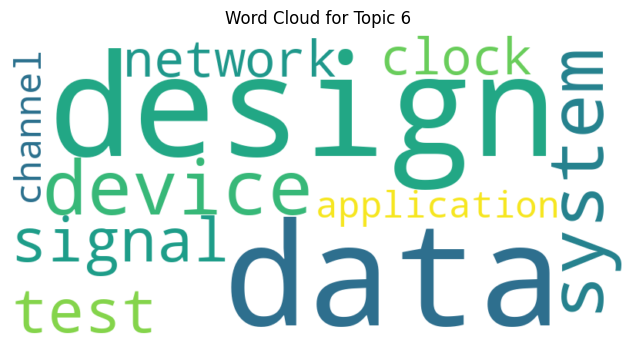

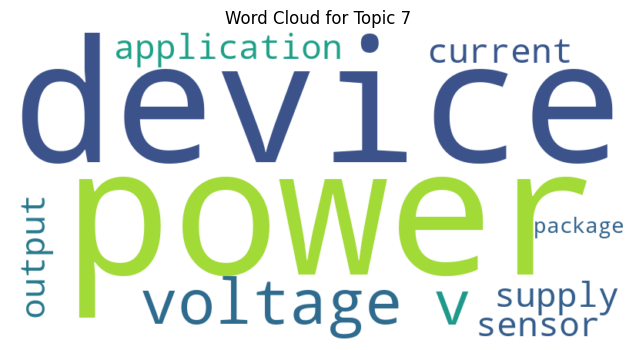

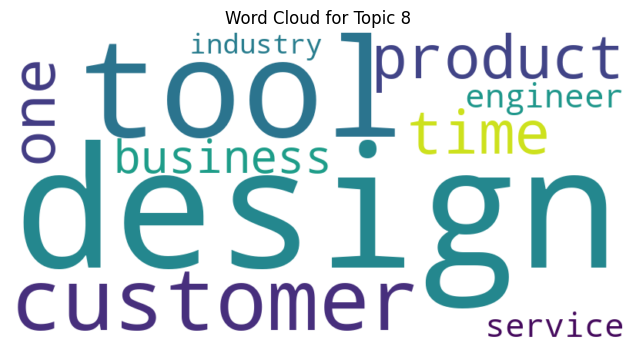

In [ ]:
# Generate word clouds for each topic
for topic_num, words in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([word[0] for word in words]))
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Topic {}'.format(topic_num))
    plt.show()

In [ ]:
df.iloc[0]['content']

"Finding an off-the-shelf processor that is an ideal fit for an application is becoming increasingly difficult, particularly as embedded systems become more specialized. The advent of configurable microprocessors from companies such as Tensilica Inc.\n\nFinding an off-the-shelf processor that is an ideal fit for an application is becoming increasingly difficult, particularly as embedded systems become more specialized. The advent of configurable microprocessors from companies such as Tensilica Inc. (Santa Clara, Calif.), ARC Cores Inc. (San Jose, Calif.) and Lexra Inc. (San Jose) resolves many of these problems.\n\nThese configurable MPUs (CMPUs) are microprocessors that are designed by the provider to meet the exact needs of an application based upon the system designer's specific needs. The CMPU is delivered to the user as a piece of intellectual property (IP) that can be integrated into programmable logic or an ASIC design file.\n\nThe actual customization process is different for t